In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import random
import plotly.express as px
import time
import seaborn as sns

In [2]:
infile = open('..//3_k-means_clustering//apartment_data_frame_clustered_600','rb')
frame = pkl.load(infile)
infile.close()

In [3]:
frame

,city,district,voivodeship,localization_y,localization_x,market,area,rooms,floor,floors,build_yr,price,url,price_of_sqm,cluster
0,Warszawa,Wola,mazowieckie,52.245982,20.985385,wtorny,36.00,2,parter,3,1956.0,496000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,13777.777778,490
1,Kraków,Swoszowice,małopolskie,49.991389,19.946389,wtorny,78.32,3,3,3,2014.0,538000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,6869.254341,394
2,Łódź,Śródmieście,łódzkie,51.772914,19.458331,wtorny,60.27,2,2,3,1910.0,270000.0,https://gratka.pl/nieruchomosci/mieszkanie-lod...,4479.840717,152
3,Warszawa,Stara Ochota,mazowieckie,52.218900,20.978800,wtorny,122.00,4,6,7,2020.0,1955000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,16024.590164,571
4,Kraków,Mistrzejowice,małopolskie,50.096196,20.009887,wtorny,48.07,3,3,4,1978.0,384000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,7988.350322,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54462,Warszawa,Wola,mazowieckie,52.237222,20.960556,pierwotny,109.00,4,12,13,2020.0,1460000.0,https://gratka.pl/nieruchomosci/nowe-mieszkani...,13394.495413,582
54463,Warszawa,Wola,mazowieckie,52.237222,20.960556,wtorny,82.60,4,4,5,2020.0,885000.0,https://gratka.pl/nieruchomosci/4-pokojowe-got...,10714.285714,582
54464,Poznań,Grunwald,wielkopolskie,52.392626,16.846137,wtorny,68.25,3,parter,4,2009.0,540000.0,https://gratka.pl/nieruchomosci/mieszkanie-poz...,7912.087912,197
54465,Kraków,Os. Prądnik Czerwony,małopolskie,50.088513,19.958912,wtorny,45.00,2,2,10,2019.0,610000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,13555.555556,268


## data preparation for ann

In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54467 entries, 0 to 54466
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            54467 non-null  object 
 1   district        54467 non-null  object 
 2   voivodeship     46557 non-null  object 
 3   localization_y  54467 non-null  float64
 4   localization_x  54467 non-null  float64
 5   market          54467 non-null  object 
 6   area            54467 non-null  float64
 7   rooms           54467 non-null  object 
 8   floor           54467 non-null  object 
 9   floors          54467 non-null  object 
 10  build_yr        54467 non-null  float64
 11  price           54467 non-null  float64
 12  url             54467 non-null  object 
 13  price_of_sqm    54467 non-null  float64
 14  cluster         54467 non-null  int32  
dtypes: float64(6), int32(1), object(8)
memory usage: 6.0+ MB


In [5]:
frame = frame.drop(['city','district','voivodeship','localization_y','localization_x','area','price','url'],axis=1)

In [6]:
frame.cluster = frame.cluster.apply(str)

In [7]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54467 entries, 0 to 54466
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   market        54467 non-null  object 
 1   rooms         54467 non-null  object 
 2   floor         54467 non-null  object 
 3   floors        54467 non-null  object 
 4   build_yr      54467 non-null  float64
 5   price_of_sqm  54467 non-null  float64
 6   cluster       54467 non-null  object 
dtypes: float64(2), object(5)
memory usage: 2.9+ MB


## creating dummy variables

In [8]:
dummies = pd.get_dummies(frame[['market','rooms','floor','floors','cluster']],drop_first=True)
frame = frame.drop(['market','rooms','floor','floors','cluster'],axis=1)
frame = pd.concat([frame,dummies],axis=1)

In [9]:
frame

,build_yr,price_of_sqm,market_wtorny,rooms_2,rooms_3,rooms_4,rooms_5,rooms_6,rooms_7,rooms_8,...,cluster_90,cluster_91,cluster_92,cluster_93,cluster_94,cluster_95,cluster_96,cluster_97,cluster_98,cluster_99
0,1956.0,13777.777778,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014.0,6869.254341,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1910.0,4479.840717,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020.0,16024.590164,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1978.0,7988.350322,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54462,2020.0,13394.495413,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54463,2020.0,10714.285714,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54464,2009.0,7912.087912,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54465,2019.0,13555.555556,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## train test split

In [10]:
X = frame.drop('price_of_sqm',axis=1).values
y = frame.price_of_sqm.values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
X_train= scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [17]:
X_train.shape

(40850, 673)

In [18]:
X_test.shape

(13617, 673)

In [19]:
X_train

array([[0.98425197, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.93700787, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.65748031, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.98818898, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.82677165, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.98425197, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## creating model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout
from tensorflow.keras.optimizers import Adam

In [21]:
model = Sequential()

model.add(Dense(16,activation='relu',input_dim=X_test.shape[1]))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error',random_state=0)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                10784     
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 11,001
Trainable params: 11,001
Non-trainable params: 0
_________________________________________________________________


In [23]:
# from tensorflow.keras.callbacks import EarlyStopping

In [24]:
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [25]:
start = time.time()

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=256,epochs=5000,
#           callbacks=[early_stop],
         )

stop = time.time()
print('\n',(stop-start)//60,'min.')

Train on 40850 samples, validate on 13617 samples
Epoch 1/5000
40850/40850 [==============================] - 1s 30us/sample - loss: 101898595.2599 - val_loss: 101741271.2656
Epoch 2/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 99261271.1379 - val_loss: 94824589.8527
Epoch 3/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 82760087.2550 - val_loss: 66524170.4234
Epoch 4/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 45856918.6021 - val_loss: 27603987.5967
Epoch 5/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 19877088.9423 - val_loss: 16405487.6730
Epoch 6/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 15595617.7670 - val_loss: 15072201.0628
Epoch 7/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 14556780.5900 - val_loss: 14156079.4519
Epoch 8/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 1370

40850/40850 [==============================] - 1s 17us/sample - loss: 5351945.6689 - val_loss: 5424147.6272
Epoch 68/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5345626.3036 - val_loss: 5422619.9338
Epoch 69/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5343871.2392 - val_loss: 5419358.9270
Epoch 70/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 5338787.9490 - val_loss: 5414081.6695
Epoch 71/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5337097.7226 - val_loss: 5410967.9259
Epoch 72/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5333725.6436 - val_loss: 5412992.4226
Epoch 73/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5332035.2607 - val_loss: 5410472.0668
Epoch 74/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 5328237.4254 - val_loss: 5406567.2090
Epoch 75/5000
40850/40850 [===========

Epoch 134/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5237779.4138 - val_loss: 5336521.6116
Epoch 135/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5237721.3799 - val_loss: 5341016.4985
Epoch 136/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5235880.6988 - val_loss: 5337920.9055
Epoch 137/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5234918.0908 - val_loss: 5341712.5863
Epoch 138/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 5235409.9418 - val_loss: 5335000.5758
Epoch 139/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5234084.6084 - val_loss: 5335797.1422
Epoch 140/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5234293.7615 - val_loss: 5333512.2437
Epoch 141/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5232626.5329 - val_loss: 5335885.9277
Epoch 142/5000
4

40850/40850 [==============================] - 1s 13us/sample - loss: 5201286.4776 - val_loss: 5317882.7679
Epoch 201/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5200148.7983 - val_loss: 5317917.7180
Epoch 202/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5199882.6649 - val_loss: 5315999.7170
Epoch 203/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5201171.0804 - val_loss: 5316787.2469
Epoch 204/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5199525.0720 - val_loss: 5319768.4670
Epoch 205/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5198401.8971 - val_loss: 5318612.5774
Epoch 206/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 5198368.9381 - val_loss: 5315442.1261
Epoch 207/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 5197443.7553 - val_loss: 5318221.6064
Epoch 208/5000
40850/40850 [===

40850/40850 [==============================] - 1s 14us/sample - loss: 5174943.7923 - val_loss: 5308316.8832
Epoch 267/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5175022.1491 - val_loss: 5304759.5538
Epoch 268/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5174733.1170 - val_loss: 5303285.0820
Epoch 269/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5176327.1741 - val_loss: 5301930.3193
Epoch 270/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5174649.6734 - val_loss: 5302308.2096
Epoch 271/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5174344.3701 - val_loss: 5302763.8928
Epoch 272/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5174259.8890 - val_loss: 5302216.3300
Epoch 273/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5172978.9319 - val_loss: 5301117.8327
Epoch 274/5000
40850/40850 [===

40850/40850 [==============================] - 1s 13us/sample - loss: 5147968.3720 - val_loss: 5280174.9370
Epoch 333/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 5146417.1176 - val_loss: 5280314.4286
Epoch 334/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5144498.4237 - val_loss: 5279361.2194
Epoch 335/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5145486.8011 - val_loss: 5279545.8853
Epoch 336/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5146873.4118 - val_loss: 5281592.6959
Epoch 337/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5142802.1581 - val_loss: 5279060.2574
Epoch 338/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5143531.3596 - val_loss: 5278909.2577
Epoch 339/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5141803.0597 - val_loss: 5286778.1141
Epoch 340/5000
40850/40850 [===

40850/40850 [==============================] - 0s 12us/sample - loss: 5095723.2310 - val_loss: 5260455.3133
Epoch 399/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5094663.2108 - val_loss: 5249821.5897
Epoch 400/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 5092284.5087 - val_loss: 5247811.9660
Epoch 401/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5092424.7683 - val_loss: 5249875.7635
Epoch 402/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5091647.4382 - val_loss: 5246622.8481
Epoch 403/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5090345.4470 - val_loss: 5247098.4972
Epoch 404/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 5090164.4080 - val_loss: 5251269.3366
Epoch 405/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5087392.5829 - val_loss: 5244454.5467
Epoch 406/5000
40850/40850 [===

40850/40850 [==============================] - 1s 14us/sample - loss: 5013790.0802 - val_loss: 5213772.6049
Epoch 465/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 5013045.1327 - val_loss: 5212051.1720
Epoch 466/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5013953.7713 - val_loss: 5212842.2289
Epoch 467/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 5009135.4345 - val_loss: 5212519.4495
Epoch 468/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 5007225.1058 - val_loss: 5208084.1928
Epoch 469/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 5005666.9043 - val_loss: 5210524.6295
Epoch 470/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 5004734.3840 - val_loss: 5208263.0577
Epoch 471/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 5003532.4566 - val_loss: 5205606.2402
Epoch 472/5000
40850/40850 [===

40850/40850 [==============================] - 1s 13us/sample - loss: 4924885.4123 - val_loss: 5177215.3520
Epoch 531/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4921052.0237 - val_loss: 5178504.7115
Epoch 532/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4917451.4292 - val_loss: 5176089.5645
Epoch 533/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4917417.5694 - val_loss: 5175276.8587
Epoch 534/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4916362.9934 - val_loss: 5174565.3293
Epoch 535/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4914542.5958 - val_loss: 5173095.4302
Epoch 536/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4914985.8933 - val_loss: 5174449.8206
Epoch 537/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4912103.4562 - val_loss: 5173750.2387
Epoch 538/5000
40850/40850 [===

40850/40850 [==============================] - 1s 20us/sample - loss: 4855479.6315 - val_loss: 5161549.9824
Epoch 597/5000
40850/40850 [==============================] - 1s 22us/sample - loss: 4855142.7417 - val_loss: 5161782.5244
Epoch 598/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 4854934.3370 - val_loss: 5162126.7485
Epoch 599/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4851515.6286 - val_loss: 5159694.1581
Epoch 600/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4849833.4213 - val_loss: 5158635.5135
Epoch 601/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4848832.0199 - val_loss: 5159304.9758
Epoch 602/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4850612.8904 - val_loss: 5161232.8775
Epoch 603/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4848051.0522 - val_loss: 5158393.1682
Epoch 604/5000
40850/40850 [===

40850/40850 [==============================] - 1s 14us/sample - loss: 4805786.4373 - val_loss: 5155386.3465
Epoch 663/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4805722.9603 - val_loss: 5154567.3913
Epoch 664/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4805167.5590 - val_loss: 5153228.7969
Epoch 665/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4808367.6367 - val_loss: 5150648.3864
Epoch 666/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4804196.6052 - val_loss: 5150217.8264
Epoch 667/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4803400.8236 - val_loss: 5156641.8678
Epoch 668/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4804001.9874 - val_loss: 5149811.9042
Epoch 669/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4804840.8730 - val_loss: 5157641.2018
Epoch 670/5000
40850/40850 [===

40850/40850 [==============================] - 1s 13us/sample - loss: 4763260.5743 - val_loss: 5148414.2050
Epoch 729/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4760832.6916 - val_loss: 5150003.9599
Epoch 730/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4762548.1935 - val_loss: 5148831.8466
Epoch 731/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4761022.1659 - val_loss: 5153313.9193
Epoch 732/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4760938.6825 - val_loss: 5143502.3827
Epoch 733/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4761250.3647 - val_loss: 5148161.7276
Epoch 734/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4759638.2472 - val_loss: 5148115.8167
Epoch 735/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4757674.5362 - val_loss: 5148705.3391
Epoch 736/5000
40850/40850 [===

40850/40850 [==============================] - 1s 14us/sample - loss: 4732682.2069 - val_loss: 5150375.8413
Epoch 795/5000
40850/40850 [==============================] - 1s 21us/sample - loss: 4732916.1561 - val_loss: 5152157.5857
Epoch 796/5000
40850/40850 [==============================] - 1s 20us/sample - loss: 4730920.2815 - val_loss: 5155392.8300
Epoch 797/5000
40850/40850 [==============================] - 1s 20us/sample - loss: 4732839.0377 - val_loss: 5156099.1559
Epoch 798/5000
40850/40850 [==============================] - 1s 20us/sample - loss: 4732693.8398 - val_loss: 5151630.2982
Epoch 799/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4730462.7203 - val_loss: 5154453.2107
Epoch 800/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4730156.0994 - val_loss: 5158197.5460
Epoch 801/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4731792.3063 - val_loss: 5150925.9578
Epoch 802/5000
40850/40850 [===

40850/40850 [==============================] - 1s 15us/sample - loss: 4707783.6333 - val_loss: 5142448.9650
Epoch 861/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4708654.5928 - val_loss: 5142328.5943
Epoch 862/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4705920.9570 - val_loss: 5143710.4352
Epoch 863/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4706027.8888 - val_loss: 5137927.3803
Epoch 864/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4705530.6532 - val_loss: 5141902.1593
Epoch 865/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4704649.7686 - val_loss: 5138262.1524
Epoch 866/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4705192.1714 - val_loss: 5142899.6163
Epoch 867/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4704768.9060 - val_loss: 5141981.6683
Epoch 868/5000
40850/40850 [===

40850/40850 [==============================] - 1s 15us/sample - loss: 4690105.4176 - val_loss: 5139706.0870
Epoch 927/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4688277.7722 - val_loss: 5144168.7730
Epoch 928/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4689416.8293 - val_loss: 5145226.8033
Epoch 929/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4686805.6105 - val_loss: 5142972.8281
Epoch 930/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4687519.0242 - val_loss: 5145161.7108
Epoch 931/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4687588.1149 - val_loss: 5140203.1832
Epoch 932/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4686102.9667 - val_loss: 5142798.1966
Epoch 933/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4688846.2776 - val_loss: 5140071.6890
Epoch 934/5000
40850/40850 [===

40850/40850 [==============================] - 1s 15us/sample - loss: 4672047.6322 - val_loss: 5140385.3801
Epoch 993/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4669507.1599 - val_loss: 5153451.8581
Epoch 994/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4672042.5678 - val_loss: 5146537.9027
Epoch 995/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4670453.7614 - val_loss: 5138554.3020
Epoch 996/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4669873.7269 - val_loss: 5135234.2357
Epoch 997/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4669820.7306 - val_loss: 5136801.0399
Epoch 998/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4669052.6809 - val_loss: 5140130.3034
Epoch 999/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4670213.8170 - val_loss: 5135396.1991
Epoch 1000/5000
40850/40850 [==

40850/40850 [==============================] - 1s 16us/sample - loss: 4654838.9249 - val_loss: 5145140.3066
Epoch 1059/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4656520.2146 - val_loss: 5147069.3356
Epoch 1060/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4654186.9410 - val_loss: 5145730.2661
Epoch 1061/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4654637.7863 - val_loss: 5140028.9740
Epoch 1062/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4655265.4847 - val_loss: 5144317.4032
Epoch 1063/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4654007.0509 - val_loss: 5141362.3359
Epoch 1064/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4655349.0828 - val_loss: 5138785.6339
Epoch 1065/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4653780.0965 - val_loss: 5140266.1028
Epoch 1066/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 4637433.5095 - val_loss: 5141131.3604
Epoch 1125/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4636455.4499 - val_loss: 5135035.3877
Epoch 1126/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4638999.9381 - val_loss: 5140454.6486
Epoch 1127/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4636980.6062 - val_loss: 5134404.1770
Epoch 1128/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4638548.7288 - val_loss: 5140749.0605
Epoch 1129/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4637687.7047 - val_loss: 5150949.2164
Epoch 1130/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4636080.1922 - val_loss: 5133459.9451
Epoch 1131/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4637796.8142 - val_loss: 5137826.3551
Epoch 1132/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 4620126.5288 - val_loss: 5135898.8926
Epoch 1191/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4618685.1570 - val_loss: 5133294.8099
Epoch 1192/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4621847.0763 - val_loss: 5130080.3499
Epoch 1193/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4619432.3224 - val_loss: 5125289.8883
Epoch 1194/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4621648.8691 - val_loss: 5128775.5875
Epoch 1195/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4619000.3851 - val_loss: 5131417.1783
Epoch 1196/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4619602.7008 - val_loss: 5126793.5060
Epoch 1197/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 4617794.4124 - val_loss: 5130789.0196
Epoch 1198/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4602103.7118 - val_loss: 5119209.3135
Epoch 1257/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4602032.6867 - val_loss: 5119552.2460
Epoch 1258/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4603787.9676 - val_loss: 5120802.4528
Epoch 1259/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4603267.0972 - val_loss: 5125932.7107
Epoch 1260/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4601178.4402 - val_loss: 5125901.3143
Epoch 1261/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4599029.2188 - val_loss: 5119757.3791
Epoch 1262/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4599855.8707 - val_loss: 5126351.5328
Epoch 1263/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4598171.3549 - val_loss: 5116544.0947
Epoch 1264/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4570074.4050 - val_loss: 5106619.5545
Epoch 1323/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4571413.0364 - val_loss: 5106972.4689
Epoch 1324/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4572172.1517 - val_loss: 5105003.4700
Epoch 1325/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4568243.2637 - val_loss: 5099417.3217
Epoch 1326/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4571671.7853 - val_loss: 5104042.6396
Epoch 1327/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4568093.0498 - val_loss: 5099893.2550
Epoch 1328/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4568839.7824 - val_loss: 5112438.9729
Epoch 1329/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4567990.8195 - val_loss: 5097550.4511
Epoch 1330/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4507557.5974 - val_loss: 5067269.6793
Epoch 1389/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4505693.0805 - val_loss: 5056659.0275
Epoch 1390/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4505264.3295 - val_loss: 5059952.0003
Epoch 1391/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4502296.1197 - val_loss: 5060691.3774
Epoch 1392/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4501049.0534 - val_loss: 5062330.4215
Epoch 1393/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4501333.5654 - val_loss: 5056804.9793
Epoch 1394/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4498857.9521 - val_loss: 5052032.4797
Epoch 1395/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4497272.9322 - val_loss: 5055539.1670
Epoch 1396/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 4408196.4751 - val_loss: 5023313.1134
Epoch 1455/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4407960.7220 - val_loss: 5014559.1629
Epoch 1456/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4407223.9852 - val_loss: 5007004.2207
Epoch 1457/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4406277.1467 - val_loss: 5009961.4871
Epoch 1458/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4404064.3320 - val_loss: 5021705.3841
Epoch 1459/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4405826.3571 - val_loss: 5010270.2079
Epoch 1460/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4404191.4253 - val_loss: 5013732.3195
Epoch 1461/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4401339.7394 - val_loss: 5009922.2384
Epoch 1462/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 4341294.4400 - val_loss: 4971977.8293
Epoch 1521/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4339727.7627 - val_loss: 4964016.3926
Epoch 1522/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4338909.5246 - val_loss: 4963879.9761
Epoch 1523/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4336883.8236 - val_loss: 4966172.1839
Epoch 1524/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4336935.7384 - val_loss: 4967116.3087
Epoch 1525/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4334453.9380 - val_loss: 4967242.1479
Epoch 1526/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4334416.4041 - val_loss: 4964302.2519
Epoch 1527/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4334045.9112 - val_loss: 4963937.3795
Epoch 1528/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 4294416.8952 - val_loss: 4948665.9018
Epoch 1587/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4294655.1867 - val_loss: 4938456.8857
Epoch 1588/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4295525.6405 - val_loss: 4941903.5290
Epoch 1589/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4291542.9578 - val_loss: 4945796.0701
Epoch 1590/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4290420.3679 - val_loss: 4936614.7408
Epoch 1591/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4292588.6245 - val_loss: 4957357.7055
Epoch 1592/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4292955.1086 - val_loss: 4938248.7392
Epoch 1593/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4293332.9571 - val_loss: 4940064.0286
Epoch 1594/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 4257313.3634 - val_loss: 4932860.4607
Epoch 1652/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4257254.3015 - val_loss: 4911529.2745
Epoch 1653/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4257300.6959 - val_loss: 4918645.6386
Epoch 1654/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4255059.9200 - val_loss: 4911827.5283
Epoch 1655/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4258270.2619 - val_loss: 4913469.3562
Epoch 1656/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4255776.2815 - val_loss: 4910266.9635
Epoch 1657/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4255067.8137 - val_loss: 4929673.9866
Epoch 1658/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4258370.1533 - val_loss: 4909798.0274
Epoch 1659/5000
40850/40

Epoch 1717/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4230215.5909 - val_loss: 4912605.8694
Epoch 1718/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4227741.9016 - val_loss: 4914565.8154
Epoch 1719/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4230921.5763 - val_loss: 4907457.0326
Epoch 1720/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4226404.2388 - val_loss: 4912105.2273
Epoch 1721/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4225888.5796 - val_loss: 4919472.0102
Epoch 1722/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4230237.8187 - val_loss: 4912115.7024
Epoch 1723/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4224144.5668 - val_loss: 4913788.6301
Epoch 1724/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4225479.9133 - val_loss: 4913775.6251
Epoch 17

40850/40850 [==============================] - 1s 14us/sample - loss: 4196148.8860 - val_loss: 4890785.4134
Epoch 1784/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4193102.4382 - val_loss: 4884247.6704
Epoch 1785/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4193464.9593 - val_loss: 4888881.3356
Epoch 1786/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4198075.4177 - val_loss: 4884279.1526
Epoch 1787/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4192556.3039 - val_loss: 4893184.0098
Epoch 1788/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4193991.7451 - val_loss: 4878258.8869
Epoch 1789/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4195078.2509 - val_loss: 4890486.2865
Epoch 1790/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4192298.8679 - val_loss: 4885829.9533
Epoch 1791/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 4159504.8489 - val_loss: 4872989.8076
Epoch 1850/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4160403.8932 - val_loss: 4872514.5593
Epoch 1851/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4160722.1820 - val_loss: 4861875.9174
Epoch 1852/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4161717.6292 - val_loss: 4868966.5369
Epoch 1853/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4162299.1883 - val_loss: 4859300.4060
Epoch 1854/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4159303.1662 - val_loss: 4861778.9602
Epoch 1855/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4160265.0338 - val_loss: 4875097.2481
Epoch 1856/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4160485.4836 - val_loss: 4865289.8485
Epoch 1857/5000
40850/40

40850/40850 [==============================] - 0s 12us/sample - loss: 4126049.5100 - val_loss: 4836226.8893
Epoch 1916/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4129019.4083 - val_loss: 4833407.0117
Epoch 1917/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4127492.6641 - val_loss: 4837133.0077
Epoch 1918/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4123422.7845 - val_loss: 4842185.9089
Epoch 1919/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4126226.8941 - val_loss: 4836013.6842
Epoch 1920/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4122203.0185 - val_loss: 4843792.9540
Epoch 1921/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4121695.6169 - val_loss: 4842764.1908
Epoch 1922/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4121584.6216 - val_loss: 4836388.1159
Epoch 1923/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 4101251.0553 - val_loss: 4818786.8482
Epoch 1982/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4103535.5392 - val_loss: 4816126.9116
Epoch 1983/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4101482.0335 - val_loss: 4821018.0667
Epoch 1984/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4102483.3722 - val_loss: 4819990.1617
Epoch 1985/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4104094.6797 - val_loss: 4822763.3239
Epoch 1986/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4102083.6662 - val_loss: 4815497.1333
Epoch 1987/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4103266.4415 - val_loss: 4817237.1170
Epoch 1988/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4101328.0171 - val_loss: 4822408.6665
Epoch 1989/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4087878.6184 - val_loss: 4804673.9967
Epoch 2048/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4087376.7713 - val_loss: 4802359.0746
Epoch 2049/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4088825.5913 - val_loss: 4802356.7069
Epoch 2050/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4085118.7223 - val_loss: 4804522.5494
Epoch 2051/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4083156.6656 - val_loss: 4794112.9256
Epoch 2052/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4084447.4668 - val_loss: 4799347.1369
Epoch 2053/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4083418.7732 - val_loss: 4797179.8570
Epoch 2054/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4082594.9835 - val_loss: 4801695.9330
Epoch 2055/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 4066958.9507 - val_loss: 4789594.5500
Epoch 2114/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4068546.8372 - val_loss: 4799323.4856
Epoch 2115/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4070095.5620 - val_loss: 4806430.6613
Epoch 2116/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4068053.9577 - val_loss: 4802774.2484
Epoch 2117/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4069252.9776 - val_loss: 4790487.4084
Epoch 2118/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4068008.4565 - val_loss: 4794041.4632
Epoch 2119/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4068942.7422 - val_loss: 4795212.3843
Epoch 2120/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4067099.2111 - val_loss: 4793461.7150
Epoch 2121/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 4053346.7993 - val_loss: 4802444.0095
Epoch 2180/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4055891.1082 - val_loss: 4808112.7175
Epoch 2181/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4055704.6262 - val_loss: 4799449.3145
Epoch 2182/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4051767.8483 - val_loss: 4794038.9724
Epoch 2183/5000
40850/40850 [==============================] - ETA: 0s - loss: 4032708.386 - 1s 13us/sample - loss: 4054286.7490 - val_loss: 4809534.0814
Epoch 2184/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4053852.1297 - val_loss: 4794390.0501
Epoch 2185/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4053618.9230 - val_loss: 4793496.0585
Epoch 2186/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4054770.8396 - val_loss: 4797093

Epoch 2245/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4038288.7642 - val_loss: 4793851.9225
Epoch 2246/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4043257.3991 - val_loss: 4800029.2509
Epoch 2247/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4039055.0765 - val_loss: 4799841.9496
Epoch 2248/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4041103.6391 - val_loss: 4793335.3365
Epoch 2249/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4037942.5808 - val_loss: 4791055.3645
Epoch 2250/5000
40850/40850 [==============================] - ETA: 0s - loss: 4035246.721 - 1s 14us/sample - loss: 4040283.8416 - val_loss: 4791167.2553
Epoch 2251/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 4041832.1912 - val_loss: 4805184.2703
Epoch 2252/5000
40850/40850 [==============================] - 1s 21us/sample - loss: 4039954.5285 - v

Epoch 2311/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4026417.7096 - val_loss: 4794961.9120
Epoch 2312/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 4022856.1942 - val_loss: 4795977.8298
Epoch 2313/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4024371.6152 - val_loss: 4793630.9776
Epoch 2314/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4020872.7874 - val_loss: 4796256.9224
Epoch 2315/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4024504.2108 - val_loss: 4791908.8870
Epoch 2316/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4020969.8188 - val_loss: 4797840.5320
Epoch 2317/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 4021123.0934 - val_loss: 4805331.6552
Epoch 2318/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4023432.9080 - val_loss: 4786041.1629
Epoch 23

Epoch 2377/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 4013066.1544 - val_loss: 4792470.0125
Epoch 2378/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4010800.3721 - val_loss: 4805981.2223
Epoch 2379/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 4011649.9461 - val_loss: 4798632.3234
Epoch 2380/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4010942.7404 - val_loss: 4789328.3313
Epoch 2381/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4009445.5147 - val_loss: 4794346.1310
Epoch 2382/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 4011129.7847 - val_loss: 4808003.2963
Epoch 2383/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4014968.4245 - val_loss: 4792725.8224
Epoch 2384/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4009789.3066 - val_loss: 4797226.2897
Epoch 23

40850/40850 [==============================] - 1s 16us/sample - loss: 4001737.3262 - val_loss: 4794739.3700
Epoch 2444/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4000814.5955 - val_loss: 4794529.0296
Epoch 2445/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4000002.4947 - val_loss: 4792895.3263
Epoch 2446/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 4003142.9634 - val_loss: 4789548.4111
Epoch 2447/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 4000247.1515 - val_loss: 4809201.1723
Epoch 2448/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3998948.6144 - val_loss: 4811198.1117
Epoch 2449/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3999754.2090 - val_loss: 4799026.4814
Epoch 2450/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3998472.1608 - val_loss: 4795992.0381
Epoch 2451/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 3989691.0343 - val_loss: 4786675.8232
Epoch 2509/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3990648.7482 - val_loss: 4795946.9012
Epoch 2510/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3988643.7390 - val_loss: 4796585.4333
Epoch 2511/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3986859.3411 - val_loss: 4801527.9006
Epoch 2512/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3989601.2481 - val_loss: 4793057.4021
Epoch 2513/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3988111.6826 - val_loss: 4801129.2998
Epoch 2514/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3990293.9677 - val_loss: 4800844.8743
Epoch 2515/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3988690.8999 - val_loss: 4796520.6057
Epoch 2516/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 3978179.1428 - val_loss: 4787308.7107
Epoch 2575/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3979052.5835 - val_loss: 4793128.0484
Epoch 2576/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3980860.2485 - val_loss: 4805597.6545
Epoch 2577/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3987425.7993 - val_loss: 4799682.7681
Epoch 2578/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3979663.5906 - val_loss: 4792442.1357
Epoch 2579/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3979457.9433 - val_loss: 4800355.5991
Epoch 2580/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3981867.3123 - val_loss: 4801728.9986
Epoch 2581/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3980363.4730 - val_loss: 4801313.6646
Epoch 2582/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 3972768.6591 - val_loss: 4800945.4507
Epoch 2641/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3969173.2275 - val_loss: 4814685.7580
Epoch 2642/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3970360.8539 - val_loss: 4807497.9350
Epoch 2643/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3971241.6632 - val_loss: 4797307.7509
Epoch 2644/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3970557.5779 - val_loss: 4796896.0200
Epoch 2645/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3969192.0580 - val_loss: 4796520.4973
Epoch 2646/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3970075.7312 - val_loss: 4802182.8759
Epoch 2647/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3971345.5710 - val_loss: 4810175.9979
Epoch 2648/5000
40850/40

Epoch 2706/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3961733.4388 - val_loss: 4793796.0511
Epoch 2707/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3960603.5942 - val_loss: 4804987.3054
Epoch 2708/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3962163.7989 - val_loss: 4792467.1100
Epoch 2709/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3958230.3240 - val_loss: 4814869.2770
Epoch 2710/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3958756.2133 - val_loss: 4799177.1781
Epoch 2711/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3960399.4740 - val_loss: 4795075.3253
Epoch 2712/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3961156.2180 - val_loss: 4805127.5695
Epoch 2713/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3958342.7489 - val_loss: 4794133.5801
Epoch 27

40850/40850 [==============================] - 1s 14us/sample - loss: 3951698.9602 - val_loss: 4809767.7946
Epoch 2773/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3950678.5457 - val_loss: 4798219.4783
Epoch 2774/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3951527.1418 - val_loss: 4806759.6108
Epoch 2775/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3949668.4265 - val_loss: 4805442.7921
Epoch 2776/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3950876.9732 - val_loss: 4805463.7468
Epoch 2777/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3951260.2940 - val_loss: 4799320.8478
Epoch 2778/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3950618.8664 - val_loss: 4797417.8621
Epoch 2779/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3949324.2501 - val_loss: 4800056.3398
Epoch 2780/5000
40850/40

Epoch 2838/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3943043.5481 - val_loss: 4797803.9777
Epoch 2839/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3942673.5363 - val_loss: 4790341.7562
Epoch 2840/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3944567.5932 - val_loss: 4798903.6836
Epoch 2841/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3942515.7597 - val_loss: 4816873.1721
Epoch 2842/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3944143.3934 - val_loss: 4815447.3953
Epoch 2843/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3942008.3492 - val_loss: 4795492.5449
Epoch 2844/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3942445.1215 - val_loss: 4796056.8362
Epoch 2845/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3941746.3323 - val_loss: 4796284.4707
Epoch 28

Epoch 2904/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3933206.7801 - val_loss: 4804334.1686
Epoch 2905/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3935263.7439 - val_loss: 4806270.5477
Epoch 2906/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3934793.2775 - val_loss: 4807587.5524
Epoch 2907/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3933455.2573 - val_loss: 4805565.1193
Epoch 2908/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3934788.1525 - val_loss: 4802053.9888
Epoch 2909/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3933345.4666 - val_loss: 4813412.7368
Epoch 2910/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3934087.3107 - val_loss: 4803900.5812
Epoch 2911/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3934449.1367 - val_loss: 4807079.5199
Epoch 29

40850/40850 [==============================] - 1s 15us/sample - loss: 3924983.0851 - val_loss: 4811728.0908
Epoch 2971/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3924802.4692 - val_loss: 4824747.5035
Epoch 2972/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3923689.6855 - val_loss: 4806691.2767
Epoch 2973/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3928182.5277 - val_loss: 4806489.8357
Epoch 2974/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3922558.2300 - val_loss: 4850349.9499
Epoch 2975/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 3925330.5360 - val_loss: 4816668.3620
Epoch 2976/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3922231.9141 - val_loss: 4795862.2219
Epoch 2977/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3924358.6272 - val_loss: 4819677.6502
Epoch 2978/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3912501.7742 - val_loss: 4802261.8211
Epoch 3037/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3912733.6102 - val_loss: 4812891.6805
Epoch 3038/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3913663.6298 - val_loss: 4795449.8315
Epoch 3039/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3913197.4083 - val_loss: 4806410.4989
Epoch 3040/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3912622.3435 - val_loss: 4795296.2401
Epoch 3041/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3912565.4565 - val_loss: 4810603.0900
Epoch 3042/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3911577.9011 - val_loss: 4799061.4522
Epoch 3043/5000
40850/40850 [==============================] - 1s 21us/sample - loss: 3908354.0453 - val_loss: 4815003.6663
Epoch 3044/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 3901530.0362 - val_loss: 4807831.6960
Epoch 3103/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3899652.9649 - val_loss: 4812459.9946
Epoch 3104/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3902095.8714 - val_loss: 4804260.0914
Epoch 3105/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3902323.7865 - val_loss: 4789562.8760
Epoch 3106/5000
40850/40850 [==============================] - ETA: 0s - loss: 3923349.337 - 1s 13us/sample - loss: 3899736.5642 - val_loss: 4796489.6699
Epoch 3107/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3899729.5275 - val_loss: 4806317.2635
Epoch 3108/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3898324.0239 - val_loss: 4806973.6689
Epoch 3109/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3900814.3949 - val_loss: 4793563

40850/40850 [==============================] - 1s 13us/sample - loss: 3888801.5937 - val_loss: 4810146.5323
Epoch 3168/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3890854.7839 - val_loss: 4799445.4789
Epoch 3169/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3885969.9180 - val_loss: 4796290.4934
Epoch 3170/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3884787.0949 - val_loss: 4793365.7021
Epoch 3171/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 3888392.8723 - val_loss: 4798701.1315
Epoch 3172/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3883474.5971 - val_loss: 4780001.8377
Epoch 3173/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3886736.9370 - val_loss: 4800025.0228
Epoch 3174/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 3884664.4045 - val_loss: 4797811.1020
Epoch 3175/5000
40850/40

40850/40850 [==============================] - 1s 18us/sample - loss: 3874055.2395 - val_loss: 4791417.1321
Epoch 3234/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3870866.4521 - val_loss: 4808470.2544
Epoch 3235/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3871934.1820 - val_loss: 4803431.9827
Epoch 3236/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3872914.1806 - val_loss: 4804984.6327
Epoch 3237/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 3869272.9990 - val_loss: 4814812.8289
Epoch 3238/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3873944.9159 - val_loss: 4816217.1134
Epoch 3239/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3872497.8521 - val_loss: 4812887.1245
Epoch 3240/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3870077.4499 - val_loss: 4813078.8302
Epoch 3241/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 3863496.9830 - val_loss: 4790087.6690
Epoch 3300/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3862328.9585 - val_loss: 4795954.7903
Epoch 3301/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3863792.4633 - val_loss: 4804985.3039
Epoch 3302/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3860041.2238 - val_loss: 4809631.4960
Epoch 3303/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3863816.7903 - val_loss: 4811874.2594
Epoch 3304/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3861449.5319 - val_loss: 4795843.3255
Epoch 3305/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3861250.1350 - val_loss: 4820869.5425
Epoch 3306/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3864201.2432 - val_loss: 4802737.7550
Epoch 3307/5000
40850/40

40850/40850 [==============================] - 1s 12us/sample - loss: 3852360.2991 - val_loss: 4790941.7478
Epoch 3366/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3853621.4951 - val_loss: 4787821.1856
Epoch 3367/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3852739.7078 - val_loss: 4796178.4195
Epoch 3368/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3852810.1490 - val_loss: 4798833.6435
Epoch 3369/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3856267.2482 - val_loss: 4795727.3831
Epoch 3370/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3852958.2227 - val_loss: 4793087.9598
Epoch 3371/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3851452.7792 - val_loss: 4792337.3316
Epoch 3372/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3854229.8924 - val_loss: 4800385.3844
Epoch 3373/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 3844216.2746 - val_loss: 4788781.0658
Epoch 3432/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 3839321.6792 - val_loss: 4786787.8788
Epoch 3433/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3841511.6160 - val_loss: 4806565.5758
Epoch 3434/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3841794.4675 - val_loss: 4795861.1452
Epoch 3435/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3840377.1255 - val_loss: 4806189.6203
Epoch 3436/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3840387.0241 - val_loss: 4789230.9484
Epoch 3437/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3840642.5625 - val_loss: 4800890.3152
Epoch 3438/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3839500.3664 - val_loss: 4791308.8640
Epoch 3439/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 3827841.8312 - val_loss: 4807189.7212
Epoch 3498/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3827174.2789 - val_loss: 4795338.7933
Epoch 3499/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3827201.1960 - val_loss: 4789011.8385
Epoch 3500/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3825861.2259 - val_loss: 4807291.3549
Epoch 3501/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3827657.8514 - val_loss: 4807798.1524
Epoch 3502/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3825146.8365 - val_loss: 4801948.5397
Epoch 3503/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3826806.8227 - val_loss: 4800837.1569
Epoch 3504/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3825637.0549 - val_loss: 4801530.1587
Epoch 3505/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 3818114.2726 - val_loss: 4821729.9095
Epoch 3564/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3816818.7702 - val_loss: 4814519.9339
Epoch 3565/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3816001.0899 - val_loss: 4816161.7851
Epoch 3566/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3813554.5914 - val_loss: 4802886.7743
Epoch 3567/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3817386.7317 - val_loss: 4824054.7807
Epoch 3568/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3812970.5180 - val_loss: 4814762.8269
Epoch 3569/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3814886.7126 - val_loss: 4806255.8613
Epoch 3570/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3814510.5988 - val_loss: 4824158.2947
Epoch 3571/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 3803535.5349 - val_loss: 4825372.2308
Epoch 3630/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3804686.6579 - val_loss: 4818783.9228
Epoch 3631/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3804316.4797 - val_loss: 4811529.5763
Epoch 3632/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3803815.3173 - val_loss: 4817917.6437
Epoch 3633/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3802165.4726 - val_loss: 4826079.6573
Epoch 3634/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3801128.2835 - val_loss: 4810144.4974
Epoch 3635/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3802725.4087 - val_loss: 4821680.7951
Epoch 3636/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3802034.0122 - val_loss: 4812666.9248
Epoch 3637/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 3790149.2695 - val_loss: 4807287.5674
Epoch 3696/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3789792.6937 - val_loss: 4828140.1214
Epoch 3697/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3795057.0109 - val_loss: 4810941.8511
Epoch 3698/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3791675.8193 - val_loss: 4805567.5996
Epoch 3699/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3789733.9265 - val_loss: 4801934.2362
Epoch 3700/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3790419.5748 - val_loss: 4806991.4340
Epoch 3701/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3791391.7944 - val_loss: 4800137.7152
Epoch 3702/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3788128.8151 - val_loss: 4812207.0963
Epoch 3703/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3782185.7135 - val_loss: 4802925.8618
Epoch 3762/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3780205.6936 - val_loss: 4810051.9259
Epoch 3763/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3780071.8129 - val_loss: 4827878.2488
Epoch 3764/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3781657.2674 - val_loss: 4808825.7389
Epoch 3765/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3778886.5591 - val_loss: 4816029.6830
Epoch 3766/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3780914.1780 - val_loss: 4808775.6359
Epoch 3767/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3782470.9402 - val_loss: 4806538.3187
Epoch 3768/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3781140.2880 - val_loss: 4825243.7722
Epoch 3769/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3774427.0907 - val_loss: 4812923.4689
Epoch 3828/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3773595.9752 - val_loss: 4804394.4094
Epoch 3829/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3775458.1339 - val_loss: 4799721.3999
Epoch 3830/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3773008.4639 - val_loss: 4820386.4155
Epoch 3831/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3775837.2380 - val_loss: 4812648.1511
Epoch 3832/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3771689.7837 - val_loss: 4834243.8767
Epoch 3833/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3771429.1152 - val_loss: 4822640.3559
Epoch 3834/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3771333.5303 - val_loss: 4819032.2318
Epoch 3835/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 3763887.9166 - val_loss: 4793934.2517
Epoch 3894/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3764876.8612 - val_loss: 4804250.6103
Epoch 3895/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3765302.2803 - val_loss: 4811966.2974
Epoch 3896/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3764850.2637 - val_loss: 4804537.3635
Epoch 3897/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3763504.9711 - val_loss: 4812004.8531
Epoch 3898/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3766496.7753 - val_loss: 4835020.4149
Epoch 3899/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3767208.7997 - val_loss: 4807566.4059
Epoch 3900/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3764935.8126 - val_loss: 4818864.2865
Epoch 3901/5000
40850/40

40850/40850 [==============================] - 1s 12us/sample - loss: 3757107.6735 - val_loss: 4807740.7949
Epoch 3960/5000
40850/40850 [==============================] - 0s 12us/sample - loss: 3754554.0555 - val_loss: 4827560.4363
Epoch 3961/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3755283.7911 - val_loss: 4807352.7960
Epoch 3962/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3755332.5198 - val_loss: 4820510.9170
Epoch 3963/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3754745.7300 - val_loss: 4830406.5271
Epoch 3964/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3756310.4508 - val_loss: 4817011.9365
Epoch 3965/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3755340.6408 - val_loss: 4819896.6951
Epoch 3966/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3752807.5256 - val_loss: 4813773.6491
Epoch 3967/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 3741983.1275 - val_loss: 4829033.5954
Epoch 4026/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3744486.8634 - val_loss: 4821371.2908
Epoch 4027/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3744628.9264 - val_loss: 4821080.0887
Epoch 4028/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3742038.5436 - val_loss: 4831809.3795
Epoch 4029/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3744875.4576 - val_loss: 4842252.6115
Epoch 4030/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3743660.4666 - val_loss: 4838253.1212
Epoch 4031/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3741327.1909 - val_loss: 4828318.8470
Epoch 4032/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3744634.1071 - val_loss: 4836761.3908
Epoch 4033/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 3732164.3224 - val_loss: 4861001.2145
Epoch 4092/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3735801.0750 - val_loss: 4840425.1806
Epoch 4093/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3735321.5153 - val_loss: 4859141.0803
Epoch 4094/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3736071.6055 - val_loss: 4842861.7477
Epoch 4095/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3735585.5403 - val_loss: 4846605.0965
Epoch 4096/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3735871.3551 - val_loss: 4835192.5644
Epoch 4097/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3734883.9872 - val_loss: 4834828.2960
Epoch 4098/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3732358.9350 - val_loss: 4844053.1077
Epoch 4099/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 3728797.7027 - val_loss: 4852250.4989
Epoch 4158/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3729459.3623 - val_loss: 4835783.5963
Epoch 4159/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3733312.0258 - val_loss: 4828326.1926
Epoch 4160/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3733635.4752 - val_loss: 4823247.7353
Epoch 4161/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3730082.2633 - val_loss: 4834636.0674
Epoch 4162/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3728994.3844 - val_loss: 4847857.7165
Epoch 4163/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3728465.2983 - val_loss: 4853613.4545
Epoch 4164/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3732505.2139 - val_loss: 4837505.4703
Epoch 4165/5000
40850/40

40850/40850 [==============================] - 1s 13us/sample - loss: 3724851.4315 - val_loss: 4855537.3090
Epoch 4224/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3723984.8071 - val_loss: 4843775.6508
Epoch 4225/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3723781.6186 - val_loss: 4852235.9217
Epoch 4226/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3720917.9820 - val_loss: 4868965.7329
Epoch 4227/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3725967.5969 - val_loss: 4863261.9615
Epoch 4228/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3723821.9130 - val_loss: 4839276.2353
Epoch 4229/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3723157.8592 - val_loss: 4838568.9390
Epoch 4230/5000
40850/40850 [==============================] - 1s 12us/sample - loss: 3720371.0225 - val_loss: 4842062.6591
Epoch 4231/5000
40850/40

Epoch 4289/5000
40850/40850 [==============================] - 1s 13us/sample - loss: 3717789.1929 - val_loss: 4859749.1712
Epoch 4290/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3718098.1342 - val_loss: 4839756.6171
Epoch 4291/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3718414.5458 - val_loss: 4863946.8109
Epoch 4292/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3716215.5407 - val_loss: 4872305.3952
Epoch 4293/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3718685.2185 - val_loss: 4852108.7626
Epoch 4294/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3716383.6940 - val_loss: 4844820.3133
Epoch 4295/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3719340.9000 - val_loss: 4844145.6746
Epoch 4296/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3716538.2970 - val_loss: 4853323.4896
Epoch 42

40850/40850 [==============================] - 1s 14us/sample - loss: 3715281.0873 - val_loss: 4841483.2939
Epoch 4356/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3721709.4435 - val_loss: 4828714.4959
Epoch 4357/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3715505.3130 - val_loss: 4848015.9836
Epoch 4358/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3716096.2786 - val_loss: 4853537.2675
Epoch 4359/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3711046.0030 - val_loss: 4841048.8423
Epoch 4360/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3712928.4406 - val_loss: 4843417.9745
Epoch 4361/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3712359.1438 - val_loss: 4859965.6709
Epoch 4362/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3711938.1387 - val_loss: 4831660.1882
Epoch 4363/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 3705771.2384 - val_loss: 4869953.7424
Epoch 4422/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3710083.8128 - val_loss: 4834973.7853
Epoch 4423/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3708912.7947 - val_loss: 4835395.1458
Epoch 4424/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3708650.9376 - val_loss: 4859393.3899
Epoch 4425/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3711855.9860 - val_loss: 4842401.0671
Epoch 4426/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3704578.8620 - val_loss: 4855602.8200
Epoch 4427/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3705899.1716 - val_loss: 4848450.7991
Epoch 4428/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3704076.5336 - val_loss: 4825637.7261
Epoch 4429/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 3700881.9351 - val_loss: 4843303.8083
Epoch 4488/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3701570.7939 - val_loss: 4840423.5216
Epoch 4489/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3702691.6281 - val_loss: 4827523.0692
Epoch 4490/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3702540.7207 - val_loss: 4848495.4972
Epoch 4491/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3699852.2514 - val_loss: 4849214.9155
Epoch 4492/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3702775.6423 - val_loss: 4837654.4999
Epoch 4493/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3701287.7036 - val_loss: 4828092.2420
Epoch 4494/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3703202.5452 - val_loss: 4846917.6002
Epoch 4495/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3699708.6892 - val_loss: 4842033.9073
Epoch 4554/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3695830.9831 - val_loss: 4846871.8582
Epoch 4555/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3697315.4566 - val_loss: 4851887.7465
Epoch 4556/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3695706.8105 - val_loss: 4852601.0066
Epoch 4557/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3694960.9790 - val_loss: 4861361.3630
Epoch 4558/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3700878.6573 - val_loss: 4861389.0355
Epoch 4559/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3696256.0839 - val_loss: 4847092.8326
Epoch 4560/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3695870.7578 - val_loss: 4843973.9409
Epoch 4561/5000
40850/40

Epoch 4619/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3693893.3232 - val_loss: 4854171.8335
Epoch 4620/5000
40850/40850 [==============================] - 1s 19us/sample - loss: 3691519.3012 - val_loss: 4847308.8266
Epoch 4621/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3689401.7694 - val_loss: 4856574.0927
Epoch 4622/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3691334.4321 - val_loss: 4855262.8789
Epoch 4623/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3690034.3435 - val_loss: 4847460.1489
Epoch 4624/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3693186.4385 - val_loss: 4847226.8397
Epoch 4625/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3690182.6788 - val_loss: 4855967.1977
Epoch 4626/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3689868.3368 - val_loss: 4865990.3003
Epoch 46

40850/40850 [==============================] - 1s 15us/sample - loss: 3688232.9819 - val_loss: 4846603.0195
Epoch 4686/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3688432.2007 - val_loss: 4843175.8747
Epoch 4687/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3687338.5192 - val_loss: 4849442.6111
Epoch 4688/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3686522.5711 - val_loss: 4840363.5869
Epoch 4689/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3687299.8129 - val_loss: 4844546.8997
Epoch 4690/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3686604.7442 - val_loss: 4860454.7718
Epoch 4691/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3686908.0291 - val_loss: 4861064.7996
Epoch 4692/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3687258.7566 - val_loss: 4834216.6423
Epoch 4693/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 3680410.2935 - val_loss: 4841281.7445
Epoch 4752/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3681956.6184 - val_loss: 4857076.3698
Epoch 4753/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3681844.8717 - val_loss: 4839965.9300
Epoch 4754/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3682687.4018 - val_loss: 4862245.2570
Epoch 4755/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3681207.2563 - val_loss: 4865502.5026
Epoch 4756/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3683447.6492 - val_loss: 4837702.2360
Epoch 4757/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3681766.7447 - val_loss: 4860850.0493
Epoch 4758/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3679086.1376 - val_loss: 4835980.8220
Epoch 4759/5000
40850/40

40850/40850 [==============================] - 1s 15us/sample - loss: 3677411.9039 - val_loss: 4867776.7446
Epoch 4818/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3678263.9171 - val_loss: 4865475.3608
Epoch 4819/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3676465.4628 - val_loss: 4855913.2852
Epoch 4820/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3677179.9798 - val_loss: 4874952.2438
Epoch 4821/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3680580.8812 - val_loss: 4842099.3873
Epoch 4822/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3679395.4281 - val_loss: 4860016.6098
Epoch 4823/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3679700.0009 - val_loss: 4844356.0223
Epoch 4824/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3679497.7046 - val_loss: 4857592.6739
Epoch 4825/5000
40850/40

40850/40850 [==============================] - 1s 16us/sample - loss: 3677446.8577 - val_loss: 4851192.0580
Epoch 4884/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3675740.1537 - val_loss: 4832711.9205
Epoch 4885/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3674829.4182 - val_loss: 4866143.4393
Epoch 4886/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3673358.7043 - val_loss: 4866513.6365
Epoch 4887/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3676527.6483 - val_loss: 4844554.9359
Epoch 4888/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3674684.6001 - val_loss: 4846142.6782
Epoch 4889/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3674305.8273 - val_loss: 4827222.3311
Epoch 4890/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3676261.1773 - val_loss: 4863581.6032
Epoch 4891/5000
40850/40

40850/40850 [==============================] - 1s 14us/sample - loss: 3672208.3082 - val_loss: 4850501.1085
Epoch 4950/5000
40850/40850 [==============================] - 1s 18us/sample - loss: 3672341.3174 - val_loss: 4846387.0399
Epoch 4951/5000
40850/40850 [==============================] - 1s 17us/sample - loss: 3666666.5931 - val_loss: 4835678.6358
Epoch 4952/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3671157.6424 - val_loss: 4852831.9891
Epoch 4953/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3674400.8374 - val_loss: 4853252.4698
Epoch 4954/5000
40850/40850 [==============================] - 1s 14us/sample - loss: 3669640.8132 - val_loss: 4845834.6300
Epoch 4955/5000
40850/40850 [==============================] - 1s 15us/sample - loss: 3672590.8401 - val_loss: 4843565.3728
Epoch 4956/5000
40850/40850 [==============================] - 1s 16us/sample - loss: 3670220.0541 - val_loss: 4839696.5297
Epoch 4957/5000
40850/40

In [26]:
losses = pd.DataFrame(model.history.history)

(0.0, 10000000.0)

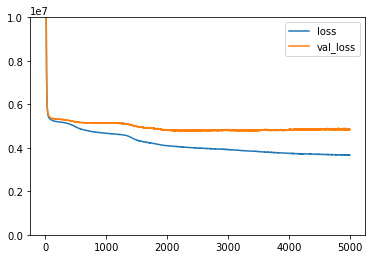

In [27]:
losses.plot()
plt.ylim(0,10000000)

## model ewaluation

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [29]:
predictions = model.predict(X_test)

In [30]:
mean_absolute_error(y_test,predictions)

1338.5155843999758

In [31]:
np.sqrt(mean_squared_error(y_test,predictions))

2204.4613691726763

In [32]:
r2_score(y_test,predictions)

0.7122122482958513

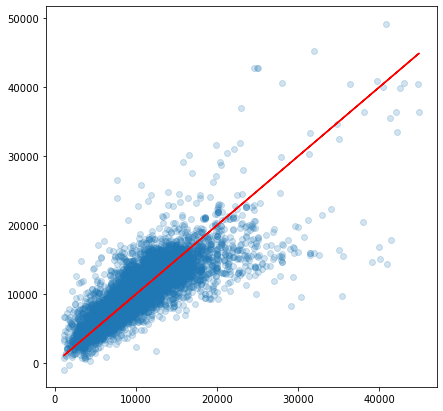

In [33]:
plt.figure(figsize=(7,7))
# plt.xlim(0,500)
# plt.ylim(0,500)

# Our predictions
plt.scatter(y_test,predictions,edgecolor=None,alpha=0.2)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [34]:
errors = y_test.reshape(y_test.shape[0], 1) - predictions

<AxesSubplot:ylabel='Count'>

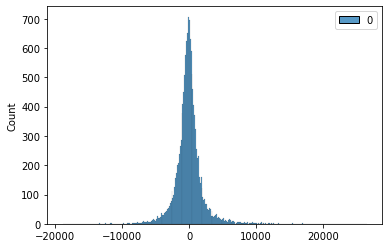

In [35]:
# plt.xlim(-200000,200000)

sns.histplot(errors)

In [36]:
predictions.reshape(y_test.shape[0])[:20]

array([ 5339.931 ,  8223.1   ,  9150.774 ,  7363.2056,  9306.034 ,
       14446.269 ,  8319.221 ,  6351.6777,  8730.284 ,  7279.164 ,
        6816.683 ,  7293.669 ,  8614.98  , 11806.936 ,  7664.463 ,
        8519.063 ,  9755.545 , 10481.522 ,  8074.9756, 13752.202 ],
      dtype=float32)

In [37]:
y_test[:20]

array([ 5327.01421801,  8641.97530864,  9614.71103327,  8914.89361702,
        9695.55035129, 15900.        ,  8136.11755607,  4818.18181818,
        5317.48514232,  8883.11688312,  6926.14770459,  6552.63157895,
        5849.6138119 , 11994.43413729,  7700.        ,  6416.99921753,
       17986.79867987,  8596.96528788,  3614.53862661, 13500.        ])

In [38]:
predictions.reshape(y_test.shape[0])[:20]/y_test[:20]

array([1.0024248 , 0.9515301 , 0.95174721, 0.8259443 , 0.95982526,
       0.90857035, 1.02250498, 1.31827274, 1.64180697, 0.81943806,
       0.98419546, 1.11309004, 1.47274346, 0.98436787, 0.99538479,
       1.32757745, 0.5423725 , 1.21921191, 2.23402664, 1.01868164])

## saving data

In [39]:
# from datetime import datetime
# from tensorflow.keras.models import load_model
# timestamp = datetime.now().strftime("%Y-%m-%d--%H-%M")
# model.save('models_ann\\' + timestamp)

In [40]:
# import joblib
# joblib.dump(scaler, 'scaler')